This notebook summarizes the counts for target gene and DRSC regions.

In [1]:
# %load ../start.py
# Load useful extensions
import os
import sys

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 1

# Set up cashdir
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -v -g

# Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Add project library to path
sys.path.insert(0, '../../lcdb-wf/lib')
sys.path.insert(0, '../../lib/python')

# Set up references
import yaml
with open('../../config/config.yml') as fh:
    config = yaml.load(fh)

assembly = config['assembly']
tag = config['aligner']['tag']
REF = os.path.join(os.environ['REFERENCES_DIR'], assembly, tag)

%matplotlib notebook

last updated: 2017-09-13 

CPython 3.5.2
IPython 6.1.0
Git hash: 55567daf07bcb9d3c0ef3de6583795596a5220f2


In [2]:
# imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
stable = pd.read_csv('../../config/sampletable.tsv', sep='\t')

In [4]:
stable.head()

,samplename,SRX,BioSample,GEO,drsc,target_FBgn,target_symbol,drsc_rep,rep,plate_id,well_id,plate_row,plate_column
0,SRR3486891,SRX1748887,SAMN04959321,GSM2145154,DRSC07681,FBgn0003396,shn,2,1,1,E8,E,8
1,SRR3486986,SRX1748983,SAMN04959673,GSM2145249,DRSC07681,FBgn0003396,shn,2,2,1,E8,E,8
2,SRR3487576,SRX1749576,SAMN04960293,GSM2145839,DRSC15627,FBgn0038742,Arc42,2,2,4,G4,G,4
3,SRR3487481,SRX1749480,SAMN04960137,GSM2145744,DRSC15627,FBgn0038742,Arc42,2,1,4,G4,G,4
4,SRR3486819,SRX1748815,SAMN04959150,GSM2145082,DRSC32770,FBgn0011715,Snr1,2,2,10,G7,G,7


In [5]:
srrs = stable.samplename.unique().tolist()

In [6]:
len(srrs)

1900

In [7]:
dfs = []
pattern = '../../rnaseq-wf/data/rnaseq_samples/{srr}/{srr}.cutadapt.bam.adjustedcounts.txt'
for srr in srrs:
    fname = pattern.format(srr=srr)
    if os.path.exists(fname):
        dfs.append(pd.read_table(fname))

df = pd.concat(dfs, ignore_index=True)

In [8]:
df

,srr,drsc,drsc_count,drsc_length,gene,gene_count,gene_length,sub_count,sub_length
0,SRR3486891,DRSC07681,336,513,FBgn0003396,911,10997,593,10484
1,SRR3486986,DRSC07681,221,513,FBgn0003396,391,10997,170,10484
2,SRR3487576,DRSC15627,163,141,FBgn0038742,181,1418,20,1277
3,SRR3487481,DRSC15627,35,141,FBgn0038742,57,1418,24,1277
4,SRR3486819,DRSC32770,21,158,FBgn0011715,125,1335,110,1177
5,SRR3486724,DRSC32770,27,158,FBgn0011715,99,1335,77,1177
6,SRR3488246,DRSC37538,215,451,FBgn0024371,260,2002,48,1551
7,SRR3488341,DRSC37538,96,451,FBgn0024371,125,2002,33,1551
8,SRR3488418,DRSCNA,0,0,FBgnNA,0,0,0,0
9,SRR3486708,DRSCNA,0,0,FBgnNA,0,0,0,0


<IPython.core.display.Javascript object>


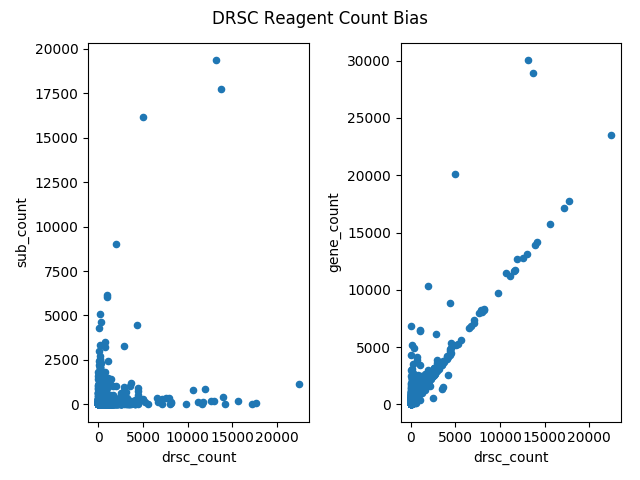

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df.plot("drsc_count", "sub_count", kind='scatter', ax=ax1)
df.plot("drsc_count", "gene_count", kind='scatter', ax=ax2)
plt.suptitle('DRSC Reagent Count Bias')
plt.tight_layout(rect=[0, 0, 1, .95])

In [10]:
drsc_rpb = df.drsc_count / df.drsc_length
sub_rpb = df.sub_count / df.sub_length
gene_rpb = df.gene_count / df.gene_length

<IPython.core.display.Javascript object>


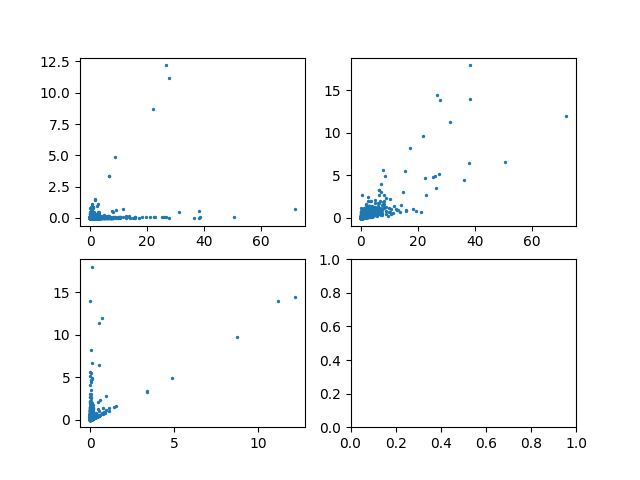

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(drsc_rpb, sub_rpb, s=2)
ax2.scatter(drsc_rpb, gene_rpb, s=2)
ax3.scatter(sub_rpb, gene_rpb, s=2)